Your goal is to predict the total_cases label for each (city, year, weekofyear) in the test set. There are two cities, San Juan and Iquitos, with test data for each city spanning 5 and 3 years respectively. You will make one submission that contains predictions for both cities. The data for each city have been concatenated along with a city column indicating the source: sj for San Juan and iq for Iquitos. The test set is a pure future hold-out, meaning the test data are sequential and non-overlapping with any of the training data. Throughout, missing values have been filled as NaNs.

https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/#features_list

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../Predicting Disease Spread/DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv')

In [4]:
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [5]:
data.columns

Index([u'city', u'year', u'weekofyear', u'week_start_date', u'ndvi_ne',
       u'ndvi_nw', u'ndvi_se', u'ndvi_sw', u'precipitation_amt_mm',
       u'reanalysis_air_temp_k', u'reanalysis_avg_temp_k',
       u'reanalysis_dew_point_temp_k', u'reanalysis_max_air_temp_k',
       u'reanalysis_min_air_temp_k', u'reanalysis_precip_amt_kg_per_m2',
       u'reanalysis_relative_humidity_percent',
       u'reanalysis_sat_precip_amt_mm',
       u'reanalysis_specific_humidity_g_per_kg', u'reanalysis_tdtr_k',
       u'station_avg_temp_c', u'station_diur_temp_rng_c',
       u'station_max_temp_c', u'station_min_temp_c', u'station_precip_mm'],
      dtype='object')

In [6]:
#The number of dengue cases for each row in the training dataset.
labels = pd.read_csv('../Predicting Disease Spread/DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv')

In [23]:
labels.head(10)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
5,sj,1990,23,2
6,sj,1990,24,4
7,sj,1990,25,5
8,sj,1990,26,10
9,sj,1990,27,6


In [24]:
data.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1


In [8]:
labels.city.value_counts()

sj    936
iq    520
Name: city, dtype: int64

## Data Analysis

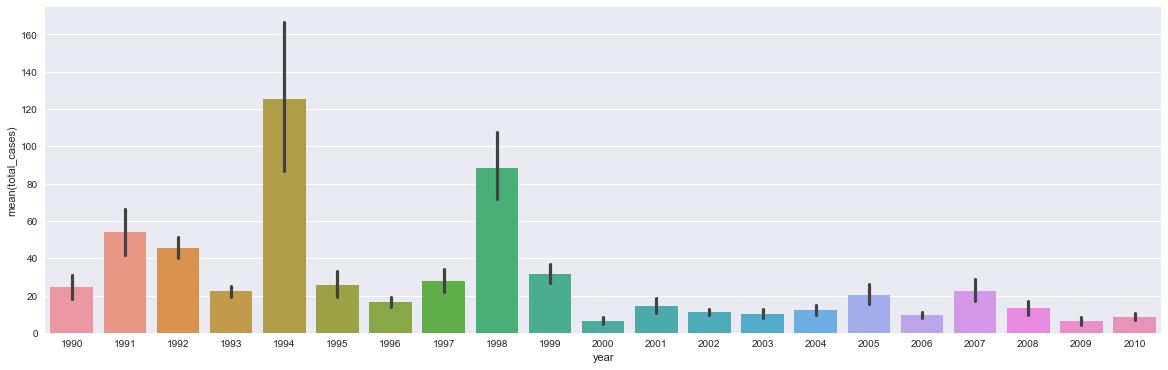

In [9]:
plt.figure(figsize = (20, 6))

sns.barplot(labels.year, labels.total_cases)
plt.show()

In [10]:
#The dengue and dengue hemorrhagic fever epidemic in Puerto Rico, 1994-1995.
# Zrobić wykres ilości wystąpień choroby w zależności od miasta / kraju"
#Examine the Distribution of the Target Column¶
#Examine Missing Values¶
#Column Types¶
#Encoding Categorical Variables¶
#Aligning Training and Testing Data¶
#Anomalies¶
#Correlations¶
#Pairs Plot
#Feature Engineering¶

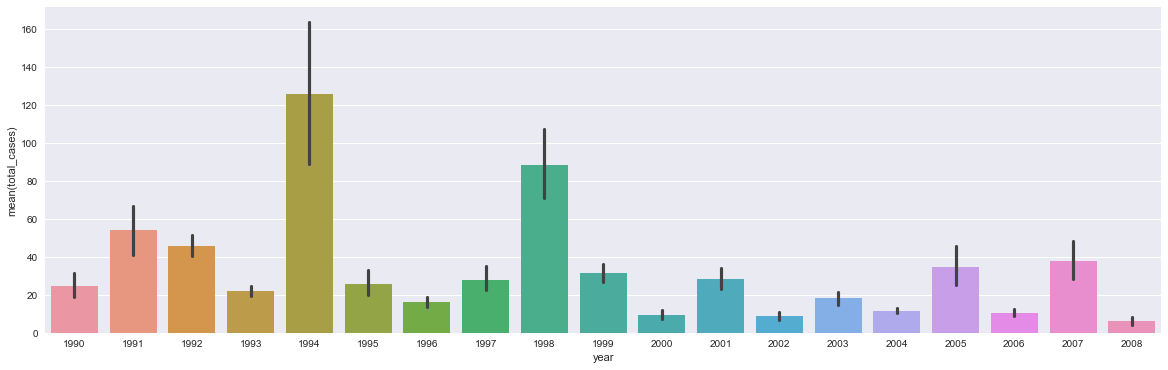

In [11]:
plt.figure(figsize = (20, 6))

sns.barplot(labels[labels["city"] == "sj"].year, labels[labels["city"] == "sj"].total_cases)
plt.show()


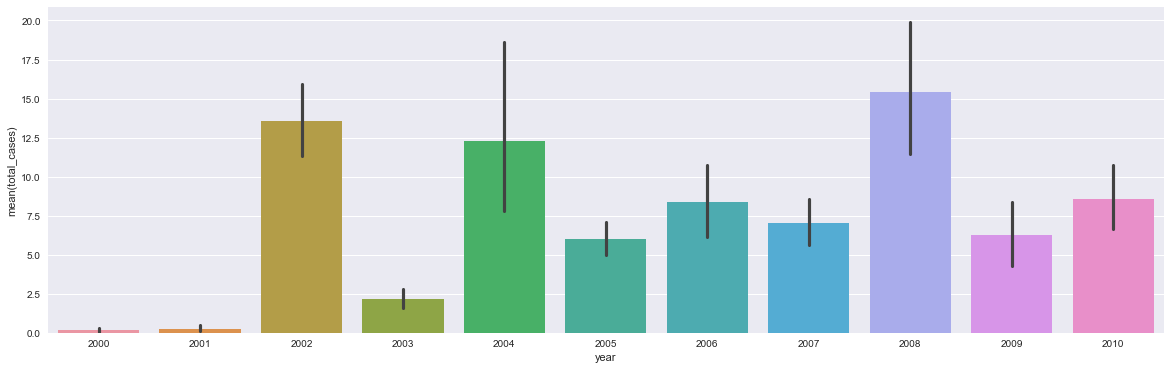

In [12]:
plt.figure(figsize = (20, 6))

sns.barplot(labels[labels["city"] == "iq"].year, labels[labels["city"] == "iq"].total_cases)
plt.show()


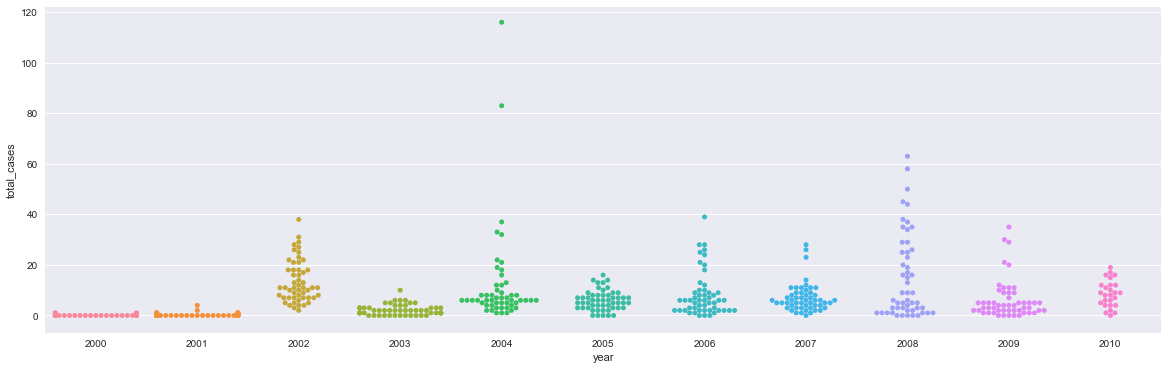

In [13]:
plt.figure(figsize = (20, 6))

sns.swarmplot(labels[labels["city"] == "iq"].year, labels[labels["city"] == "iq"].total_cases)
plt.show()


In [39]:
#connect tables
df_new = pd.concat([data,labels],axis = 1)

In [40]:
df_new.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city,year,weekofyear,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,2.628571,25.442857,6.900000,29.4,20.0,16.0,sj,1990,18,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,2.371429,26.714286,6.371429,31.7,22.2,8.6,sj,1990,19,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,2.300000,26.714286,6.485714,32.2,22.8,41.4,sj,1990,20,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,2.428571,27.471429,6.771429,33.3,23.3,4.0,sj,1990,21,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,3.014286,28.942857,9.371429,35.0,23.9,5.8,sj,1990,22,6


In [41]:
df_new.T.drop_duplicates().T

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.1226,0.103725,0.198483,0.177617,12.42,297.573,...,32,73.3657,14.0129,2.62857,25.4429,6.9,29.4,20,16,4
1,sj,1990,19,1990-05-07,0.1699,0.142175,0.162357,0.155486,22.82,298.211,...,17.94,77.3686,15.3729,2.37143,26.7143,6.37143,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.03225,0.172967,0.1572,0.170843,34.54,298.781,...,26.1,82.0529,16.8486,2.3,26.7143,6.48571,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987,...,13.9,80.3371,16.6729,2.42857,27.4714,6.77143,33.3,23.3,4,3
4,sj,1990,22,1990-05-28,0.1962,0.2622,0.2512,0.24734,7.52,299.519,...,12.2,80.46,17.21,3.01429,28.9429,9.37143,35,23.9,5.8,6
5,sj,1990,23,1990-06-04,NaN,0.17485,0.254314,0.181743,9.58,299.63,...,26.49,79.8914,17.2129,2.1,28.1143,6.94286,34.4,23.9,39.1,2
6,sj,1990,24,1990-06-11,0.1129,0.0928,0.205071,0.210271,3.48,299.207,...,38.6,82,17.2343,2.04286,27.4143,6.77143,32.2,23.3,29.7,4
7,sj,1990,25,1990-06-18,0.0725,0.0725,0.151471,0.133029,151.12,299.591,...,30,83.3757,17.9771,1.57143,28.3714,7.68571,33.9,22.8,21.1,5
8,sj,1990,26,1990-06-25,0.10245,0.146175,0.125571,0.1236,19.32,299.579,...,37.51,82.7686,17.79,1.88571,28.3286,7.38571,33.9,22.8,21.1,10
9,sj,1990,27,1990-07-02,NaN,0.12155,0.160683,0.202567,14.41,300.154,...,28.4,81.2814,18.0714,2.01429,28.3286,6.51429,33.9,24.4,1.1,6
